# Development Notebook for Cortical Crowding Project

In [1]:
import os, sys
from pathlib import Path

import numpy as np
import pandas as pd
import neuropythy as ny
import matplotlib as mpl
import matplotlib.pyplot as plt

import scipy.optimize
from scipy.stats import gmean
from scipy.optimize import curve_fit

/home/lindazelinzhou/.conda/envs/neuro/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# We want to be able to load in libraries that are in this repository's src directory,
# so we add src to the system path:
sys.path.append('../src')

# Now we can import corticalcrowding from the src directory:
import corticalcrowding as cc

In [5]:
df = pd.read_csv('/data/crowding/crowding_data_withID.csv')

In [6]:
sids = [
    'sub-wlsubj119',
    'sub-wlsubj127',
    'sub-wlsubj136',
    'sub-wlsubj137',
    'sub-wlsubj143',
    'sub-wlsubj144',
    'sub-wlsubj145',
    'sub-wlsubj146',
    'sub-wlsubj147',
    'sub-wlsubj148',
    'sub-wlsubj149',
    'sub-wlsubj150',
    'sub-wlsubj151',
    'sub-wlsubj152',
    'sub-wlsubj153',
    'sub-wlsubj154',
    'sub-wlsubj155',
    'sub-wlsubj156',
    'sub-wlsubj157',
    'sub-wlsubj158',
    'sub-wlsubj159',
    'sub-wlsubj160',
    'sub-wlsubj161',
    'sub-wlsubj162',
    'sub-wlsubj163',
    'sub-wlsubj164',
    'sub-wlsubj165',
    'sub-wlsubj166',
    'sub-wlsubj167',
    'sub-wlsubj168',
    'sub-wlsubj170',
    'sub-wlsubj171',
    'sub-wlsubj172',
    'sub-wlsubj173',
    'sub-wlsubj174',
    'sub-wlsubj175',
    'sub-wlsubj176']

## crowding

In [7]:
# each subject has 1 cd value at each eccentricity
mean_cd = df.groupby(['ID','RadialEccentricity'])['CrowdingDistance'].apply(gmean).reset_index()

In [8]:
cd_list = df['CrowdingDistance'].tolist()
mean_cd_list=mean_cd['CrowdingDistance'].tolist()

In [9]:
# create 3 dfs based on eccen
mean_1 = mean_cd[mean_cd['RadialEccentricity']==2.5]
m_1 = mean_1['CrowdingDistance'].mean()
st_1 = mean_1['CrowdingDistance'].std()
mean_2 = mean_cd[mean_cd['RadialEccentricity']==5]
m_2 = mean_2['CrowdingDistance'].mean()
st_2 = mean_2['CrowdingDistance'].std()
mean_3 = mean_cd[mean_cd['RadialEccentricity']==10]
m_3 = mean_3['CrowdingDistance'].mean()
st_3 = mean_3['CrowdingDistance'].std()

In [10]:
x_ecc = df['RadialEccentricity'].tolist()
mean_x_ecc = mean_cd['RadialEccentricity'].tolist()

In [11]:
b, _ = curve_fit(cc.crowding.func_cd, x_ecc, np.log10(cd_list), p0=0.15)
b

array([0.19811346])

In [12]:
mean_values = [m_1, m_2, m_3]
std_values = [st_1, st_2, st_3]
eccentricities = [2.5, 5, 10]

In [13]:
mean_values

[0.6885809437409106, 1.3966182263508535, 3.422964015001243]

## calculate cortical magnification

In [14]:
eccen = np.linspace(1, 11, 1000)

In [15]:
all_cmag_v1 = []
all_cmag_v2 = []
all_cmag_v3 = []
all_cmag_v4 = []
all_eccen_v1 = []
all_eccen_v2 = []
all_eccen_v3 = []
all_eccen_v4 = []
all_mask = ('variance_explained', 0.04, 1)

for sid in sids:
    try:
        sub = cc.cmag.load_subject(sid)

        # Calculate cmag for the subject for V1
        v1_mask = {'and': [('visual_area', 1), all_mask]}
        eccen_v1, cmag_v1 = cc.cmag.ring_cmag(sub, eccen=None, mask=v1_mask)
        all_eccen_v1.append(eccen_v1)
        all_cmag_v1.append(cmag_v1)

        # Calculate cmag for the subject for V2
        v2_mask = {'and': [('visual_area', 2), all_mask]}
        eccen_v2, cmag_v2 = cc.cmag.ring_cmag(sub, eccen=None, mask=v2_mask)
        all_eccen_v2.append(eccen_v2)
        all_cmag_v2.append(cmag_v2)

        # Calculate cmag for the subject for V3
        v3_mask = {'and': [('visual_area', 3), all_mask]}
        eccen_v3, cmag_v3 = cc.cmag.ring_cmag(sub, eccen=None, mask=v3_mask)
        all_eccen_v3.append(eccen_v3)
        all_cmag_v3.append(cmag_v3)
        
        # Calculate cmag for the subject for V4
        v4_mask = {'and': [('visual_area', 4), all_mask]}
        eccen_v4, cmag_v4 = cc.cmag.ring_cmag(sub, eccen=None, mask=v4_mask)
        all_eccen_v4.append(eccen_v4)
        all_cmag_v4.append(cmag_v4)
        
    
    except Exception as e:
        print(f"Error calculating cmag for subject {sid}: {e}")

all_flatcmag_v1 = np.concatenate(all_cmag_v1)
all_flateccen_v1 = np.concatenate(all_eccen_v1)
all_flatcmag_v2 = np.concatenate(all_cmag_v2)
all_flateccen_v2 = np.concatenate(all_eccen_v2)
all_flatcmag_v3 = np.concatenate(all_cmag_v3)
all_flateccen_v3 = np.concatenate(all_eccen_v3)
all_flatcmag_v4 = np.concatenate(all_cmag_v4)
all_flateccen_v4 = np.concatenate(all_eccen_v4)

Error calculating cmag for subject sub-wlsubj161: Could not interpret source path: /data/NYUNEI/derivatives/prfvista/sub-wlsubj161/ses-nyu3t01/lh.angle_adj.mgz
Error calculating cmag for subject sub-wlsubj171: Could not interpret source path: /data/NYUNEI/derivatives/rois/Linda_rh.sub-wlsubj171.ROIs_V1-4.mgz


[15.917919101867323, 1.134882418511627] [18.675160865422296, 8.092211760510644, 5.590390872060128]


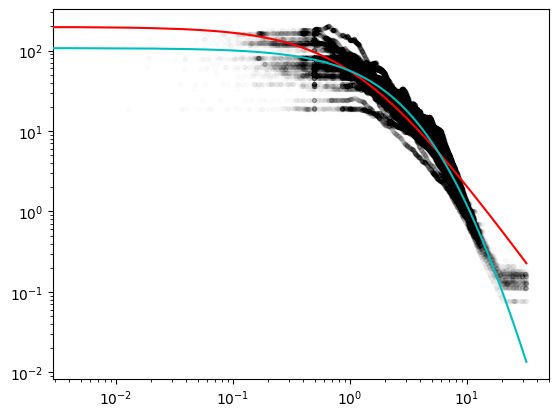

In [16]:
ii = (all_flateccen_v1 < 11) & (all_flatcmag_v1 > 0) & (all_flateccen_v1 > 0.2)
popt1 = cc.cmag.fit_cmag(all_flateccen_v1[ii], all_flatcmag_v1[ii],method='BFGS')
popt1_3params = cc.cmag.fit_cmag(all_flateccen_v1[ii], all_flatcmag_v1[ii],p0=[17.3,0.75,2],method='BFGS')
print(popt1,popt1_3params)
plt.loglog(all_flateccen_v1,all_flatcmag_v1,'k.',alpha=0.01) 
plot_ecc = np.sort(all_flateccen_v1)
plt.loglog(plot_ecc, cc.cmag.HH91(plot_ecc, *popt1),'r-', zorder=10)
plt.loglog(plot_ecc, cc.cmag.HH91(plot_ecc, *popt1_3params),'c-', zorder=10)
plt.show()

[12.918835432299513, 0.6121518291248482] [12.125505346744957, 1.133572206515478, 2.4400863155310852]


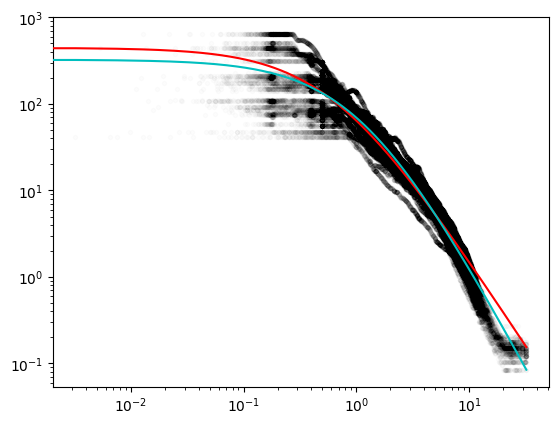

In [17]:
ii = (all_flateccen_v2 < 11) & (all_flatcmag_v2 > 0) & (all_flateccen_v2 > 0.2)
popt2 = cc.cmag.fit_cmag(all_flateccen_v2[ii], all_flatcmag_v2[ii],method='BFGS')
popt2_3params = cc.cmag.fit_cmag(all_flateccen_v2[ii], all_flatcmag_v2[ii],p0=[17.3,0.75,2],method='BFGS')
print(popt2,popt2_3params)
plt.loglog(all_flateccen_v2,all_flatcmag_v2,'k.',alpha=0.01) 
plot_ecc = np.sort(all_flateccen_v2)
plt.loglog(plot_ecc, cc.cmag.HH91(plot_ecc, *popt2),'r-', zorder=10)
plt.loglog(plot_ecc, cc.cmag.HH91(plot_ecc, *popt2_3params),'c-', zorder=10)
plt.show()

[12.368576982410717, 0.735256194019073] [11.965907429471981, 0.8431107306678487, 2.2071157163780293]


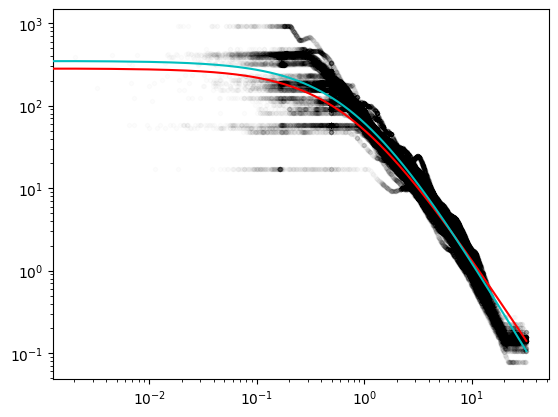

In [18]:
ii = (all_flateccen_v3 < 11) & (all_flatcmag_v3 > 0) & (all_flateccen_v3 > 0.2)
popt3 = cc.cmag.fit_cmag(all_flateccen_v3, all_flatcmag_v3,method='BFGS')
popt3_3params = cc.cmag.fit_cmag(all_flateccen_v3[ii], all_flatcmag_v3[ii],p0=[17.3,0.75,2],method='BFGS')
print(popt3,popt3_3params)
plt.loglog(all_flateccen_v3,all_flatcmag_v3,'k.',alpha=0.01) 
plot_ecc = np.sort(all_flateccen_v3)
plt.loglog(plot_ecc, cc.cmag.HH91(plot_ecc, *popt3),'r-', zorder=10)
plt.loglog(plot_ecc, cc.cmag.HH91(plot_ecc, *popt3_3params),'c-', zorder=10)
plt.show()

[7.3578056009819, 0.11443766963045292] [6.084191267694632, 0.44256211004598595, 2.701490783199254]


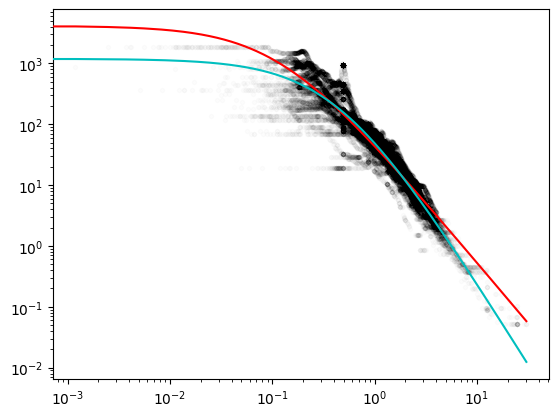

In [19]:
ii = (all_flateccen_v4 < 11) & (all_flatcmag_v4 > 0) & (all_flateccen_v4 > 0.2)
popt4 = cc.cmag.fit_cmag(all_flateccen_v4[ii], all_flatcmag_v4[ii],method='BFGS')
popt4_3params = cc.cmag.fit_cmag(all_flateccen_v4[ii], all_flatcmag_v4[ii],p0=[17.3,0.75,2],method='BFGS')
print(popt4,popt4_3params)
plt.loglog(all_flateccen_v4,all_flatcmag_v4,'k.',alpha=0.01) 
plot_ecc = np.sort(all_flateccen_v4)
plt.loglog(plot_ecc, cc.cmag.HH91(plot_ecc, *popt4),'r-', zorder=10)
plt.loglog(plot_ecc, cc.cmag.HH91(plot_ecc, *popt4_3params),'c-', zorder=10)
plt.show()

## add cortical magnification values to df

In [20]:
# magnification_values is a dict containing cmag for each visual area
magnification_values = cc.cmag.calculate_cortical_magnification(df)

for mask_value in [1, 2, 3, 4]:
    col_name = f'CorticalMagnification_{mask_value}'
    df.loc[:, col_name] = magnification_values[mask_value]

In [21]:
# get mean cortical magnification for each subject at each eccentricity
df_sub = df.groupby(['RadialEccentricity','ID'])[[
    'CorticalMagnification_1',
    'CorticalMagnification_2',
    'CorticalMagnification_3',
    'CorticalMagnification_4'
]].mean().reset_index()

In [22]:
# convert 2d cortical magnification into 1d visual magnification and change the names of columns accordingly
for col in ['CorticalMagnification_1', 'CorticalMagnification_2', 'CorticalMagnification_3', 'CorticalMagnification_4']:
    df_sub[col] = np.sqrt(1 / df_sub[col])
df_sub.rename(columns={
    'CorticalMagnification_1': 'VisualMagnification_1',
    'CorticalMagnification_2': 'VisualMagnification_2',
    'CorticalMagnification_3': 'VisualMagnification_3',
    'CorticalMagnification_4': 'VisualMagnification_4'
}, inplace=True)

In [27]:
# sort the df
df_sub.sort_values(by=['ID', 'RadialEccentricity'], inplace=True)
# add the crowding values to the df
mean_for_sub = mean_cd['CrowdingDistance'].values
df_sub['CrowdingDistance'] = mean_for_sub

In [30]:
# drop nan values
df_sub_clean = df_sub.dropna(subset=['VisualMagnification_1'])

## use cortical magnification to predict crowding

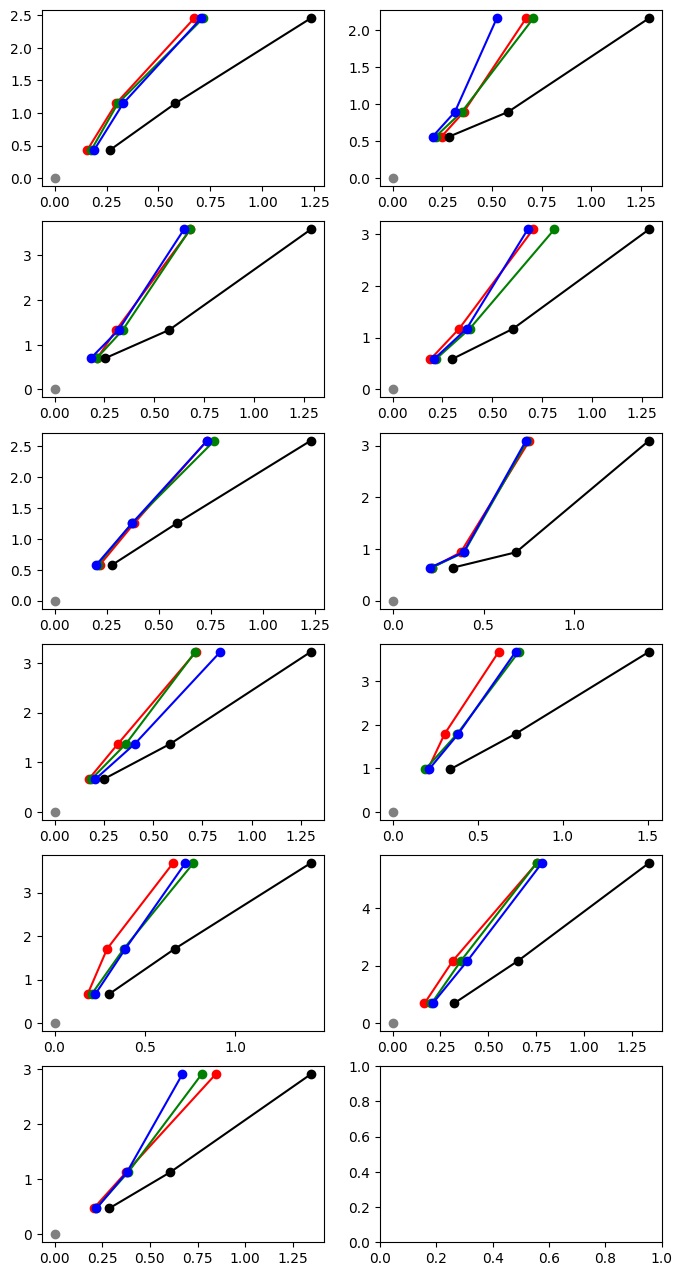

In [31]:
sids = np.unique(df_sub_clean['ID'])

(fig, axes) = plt.subplots((len(sids)+1)//2,2, figsize=(8,16))
for sid,ax in zip(sids,axes.flat):

    subject_data = df_sub_clean[df_sub_clean['ID']==sid]
    y1 = subject_data['VisualMagnification_1'].values
    y2 = subject_data['VisualMagnification_2'].values
    y3 = subject_data['VisualMagnification_3'].values
    y4 = subject_data['VisualMagnification_4'].values
    y5 = subject_data['CrowdingDistance'].values

    rss_y1, coef_y1 = cc.regression.fit_and_evaluate(y1, y5)
    rss_y2, coef_y2 = cc.regression.fit_and_evaluate(y2, y5)
    rss_y3, coef_y3 = cc.regression.fit_and_evaluate(y3, y5)
    rss_y4, coef_y4 = cc.regression.fit_and_evaluate(y4, y5)

    ax.plot(y1, y5, 'o-',color = 'r')
    ax.plot(y2, y5, 'o-',color = 'g')
    ax.plot(y3, y5, 'o-',color = 'b')
    ax.plot(y4, y5, 'o-',color = 'k')
    ax.scatter([0],[0],color = '0.5')
#ax.axis('equal')

In [32]:
grouped = df_sub_clean.groupby('ID')
subject_results = {}

# Iterate over each subject to do the regression
for subject, subject_data in grouped:
    y1 = subject_data['VisualMagnification_1'].values
    y2 = subject_data['VisualMagnification_2'].values
    y3 = subject_data['VisualMagnification_3'].values
    y4 = subject_data['VisualMagnification_4'].values
    y5 = subject_data['CrowdingDistance'].values
    
    rss_y1, coef_y1 = cc.regression.fit_and_evaluate(y1, y5)
    rss_y2, coef_y2 = cc.regression.fit_and_evaluate(y2, y5)
    rss_y3, coef_y3 = cc.regression.fit_and_evaluate(y3, y5)
    rss_y4, coef_y4 = cc.regression.fit_and_evaluate(y4, y5)
    
    rss_values = [rss_y1, rss_y2, rss_y3, rss_y4]
    best_fit_index = np.argmin(rss_values)
    best_fit = ['y1','y2','y3','y4'][best_fit_index]
    
    # create a dict to store values
    subject_results[subject] = {
        'rss_y1': rss_y1, 'coef_y1': coef_y1,
        'rss_y2': rss_y2, 'coef_y2': coef_y2,
        'rss_y3': rss_y3, 'coef_y3': coef_y3,
        'rss_y4': rss_y4, 'coef_y4': coef_y4,
        'best_fit': best_fit
    }

for subject, results in subject_results.items():
    print(f"Results for {subject}:")
    print(f"RSS for y1: {results['rss_y1']}, Coefficient: {results['coef_y1']}")
    print(f"RSS for y2: {results['rss_y2']}, Coefficient: {results['coef_y2']}")
    print(f"RSS for y3: {results['rss_y3']}, Coefficient: {results['coef_y3']}")
    print(f"RSS for y4: {results['rss_y4']}, Coefficient: {results['coef_y4']}")
    print(f"The best fit is: {results['best_fit']}\n")


Results for sub-wlsubj119:
RSS for y1: 0.024507193978437054, Coefficient: 3.646450855821389
RSS for y2: 0.04059123073977856, Coefficient: 3.4333966409508365
RSS for y3: 0.04951845196576919, Coefficient: 3.41165504648216
RSS for y4: 0.009060910026129508, Coefficient: 1.9747574079477825
The best fit is: y4

Results for sub-wlsubj127:
RSS for y1: 0.0830139754291265, Coefficient: 2.9897389754748254
RSS for y2: 0.027565342418429964, Coefficient: 2.9373050607019726
RSS for y3: 0.15153634591359771, Coefficient: 3.6983936019386596
RSS for y4: 0.013266157737997742, Coefficient: 1.666851088915826
The best fit is: y4

Results for sub-wlsubj136:
RSS for y1: 0.21099264024172776, Coefficient: 4.955899269008257
RSS for y2: 0.296865489331939, Coefficient: 4.87305479777371
RSS for y3: 0.21680066390013014, Coefficient: 5.1657204938301815
RSS for y4: 0.06080911821727214, Coefficient: 2.7109095246344026
The best fit is: y4

Results for sub-wlsubj143:
RSS for y1: 0.11281822651038169, Coefficient: 4.1571986

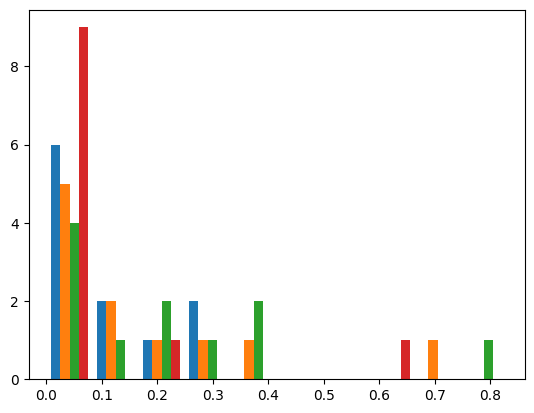

In [33]:
key = 'rss_y1'
data = [[subdata[key] for subdata in subject_results.values()]
        for key in ['rss_y1','rss_y2','rss_y3','rss_y4']]
plt.hist(data)
plt.show()

In [34]:
rss_y1_values = []
rss_y2_values = []
rss_y3_values = []
rss_y4_values = []

for subject, values in subject_results.items():
    rss_y1_values.append(values['rss_y1'])
    rss_y2_values.append(values['rss_y2'])
    rss_y3_values.append(values['rss_y3'])
    rss_y4_values.append(values['rss_y4'])

mean_rss_y1 = np.mean(rss_y1_values)
mean_rss_y2 = np.mean(rss_y2_values)
mean_rss_y3 = np.mean(rss_y3_values)
mean_rss_y4 = np.mean(rss_y4_values)

std_rss_y1 = np.std(rss_y1_values)
std_rss_y2 = np.std(rss_y2_values)
std_rss_y3 = np.std(rss_y3_values)
std_rss_y4 = np.std(rss_y4_values)

# Print results
print(f"Mean RSS for y1: {mean_rss_y1}, Standard Deviation: {std_rss_y1}")
print(f"Mean RSS for y2: {mean_rss_y2}, Standard Deviation: {std_rss_y2}")
print(f"Mean RSS for y3: {mean_rss_y3}, Standard Deviation: {std_rss_y3}")
print(f"Mean RSS for y4: {mean_rss_y4}, Standard Deviation: {std_rss_y4}")

Mean RSS for y1: 0.1232460662360046, Standard Deviation: 0.10172954136013275
Mean RSS for y2: 0.18248244182292456, Standard Deviation: 0.21367565262438193
Mean RSS for y3: 0.23982637040364654, Standard Deviation: 0.22772986356557398
Mean RSS for y4: 0.09866541419344686, Standard Deviation: 0.1691310284372962


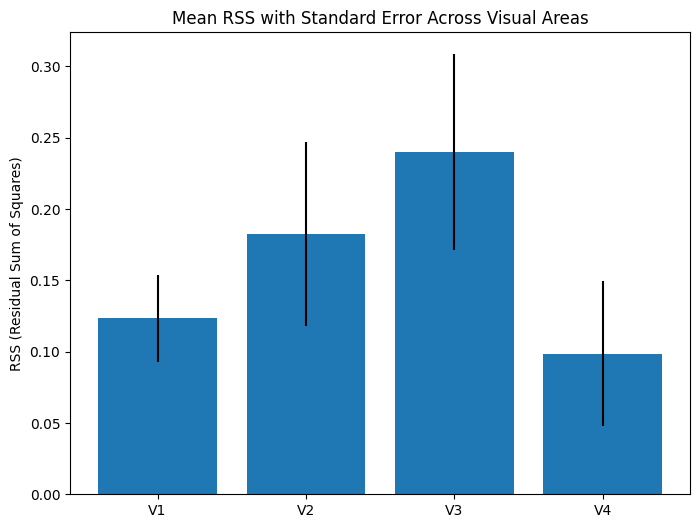

In [36]:
mean_rss = [mean_rss_y1, mean_rss_y2, mean_rss_y3, mean_rss_y4]
std_rss = [std_rss_y1, std_rss_y2, std_rss_y3, std_rss_y4]

labels = ['V1', 'V2', 'V3', 'V4']

plt.figure(figsize=(8, 6))
plt.bar(labels, mean_rss, yerr=std_rss/np.sqrt(len(sids)))

plt.ylabel('RSS (Residual Sum of Squares)')
plt.title('Mean RSS with Standard Error Across Visual Areas')
plt.show()

In [42]:
## look at group data

In [37]:
grouped_df = df.groupby('RadialEccentricity')[[
    'CorticalMagnification_1',
    'CorticalMagnification_2',
    'CorticalMagnification_3',
    'CorticalMagnification_4'
]].mean().reset_index()

# make it 1d visual magnification
for col in ['CorticalMagnification_1', 'CorticalMagnification_2', 'CorticalMagnification_3', 'CorticalMagnification_4']:
    grouped_df[col] = np.sqrt(1 / grouped_df[col])

In [38]:
grouped_df['CrowdingDistance'] = mean_values
grouped_df.rename(columns={
    'CorticalMagnification_1': 'VisualMagnification_1',
    'CorticalMagnification_2': 'VisualMagnification_2',
    'CorticalMagnification_3': 'VisualMagnification_3',
    'CorticalMagnification_4': 'VisualMagnification_4'
}, inplace=True)
grouped_df

,RadialEccentricity,VisualMagnification_1,VisualMagnification_2,VisualMagnification_3,VisualMagnification_4,CrowdingDistance
0,2.5,0.192802,0.202510,0.204179,0.286848,0.688581
1,5.0,0.328445,0.362106,0.364464,0.617238,1.396618
2,10.0,0.703470,0.740332,0.691151,1.324307,3.422964


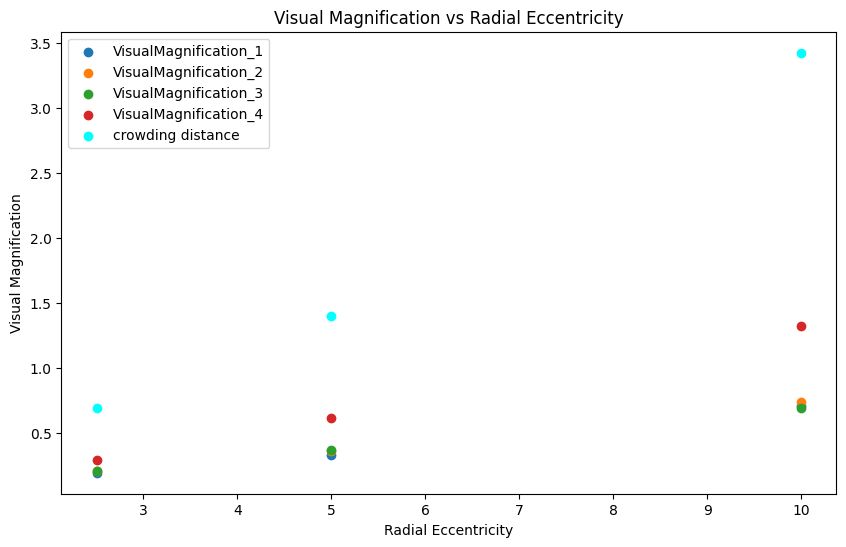

In [39]:
plt.figure(figsize=(10, 6))
for col in ['VisualMagnification_1', 'VisualMagnification_2', 'VisualMagnification_3', 'VisualMagnification_4']:
    plt.scatter(grouped_df['RadialEccentricity'], grouped_df[col], marker='o', linestyle='-', label=col)
plt.scatter(eccentricities, mean_values, color='cyan', label = 'crowding distance')
plt.xlabel('Radial Eccentricity')
plt.ylabel('Visual Magnification')
plt.title('Visual Magnification vs Radial Eccentricity')
plt.legend()
plt.show()

In [40]:
y1 = grouped_df['VisualMagnification_1'].values
y2 = grouped_df['VisualMagnification_2'].values
y3 = grouped_df['VisualMagnification_3'].values
y4 = grouped_df['VisualMagnification_4'].values
y5 = grouped_df['CrowdingDistance'].values

rss_y1, coef_y1 = cc.regression.fit_and_evaluate(y1, y5)
rss_y2, coef_y2 = cc.regression.fit_and_evaluate(y2, y5)
rss_y3, coef_y3 = cc.regression.fit_and_evaluate(y3, y5)
rss_y4, coef_y4 = cc.regression.fit_and_evaluate(y4, y5)

rss_values = [rss_y1, rss_y2, rss_y3, rss_y4]
best_fit_index = np.argmin(rss_values)
best_fit = ['y1', 'y2', 'y3', 'y4'][best_fit_index]

print(f"RSS for y1: {rss_y1}, Coefficient: {coef_y1}")
print(f"RSS for y2: {rss_y2}, Coefficient: {coef_y2}")
print(f"RSS for y3: {rss_y3}, Coefficient: {coef_y3}")
print(f"RSS for y4: {rss_y4}, Coefficient: {coef_y4}")
print(f"The best fit is: {best_fit}")

RSS for y1: 0.08247822520101082, Coefficient: 4.687195783310704
RSS for y2: 0.1069049814837579, Coefficient: 4.41433074562412
RSS for y3: 0.2001923477759463, Coefficient: 4.623331017885218
RSS for y4: 0.033731619771933, Coefficient: 2.522546003159664
The best fit is: y4


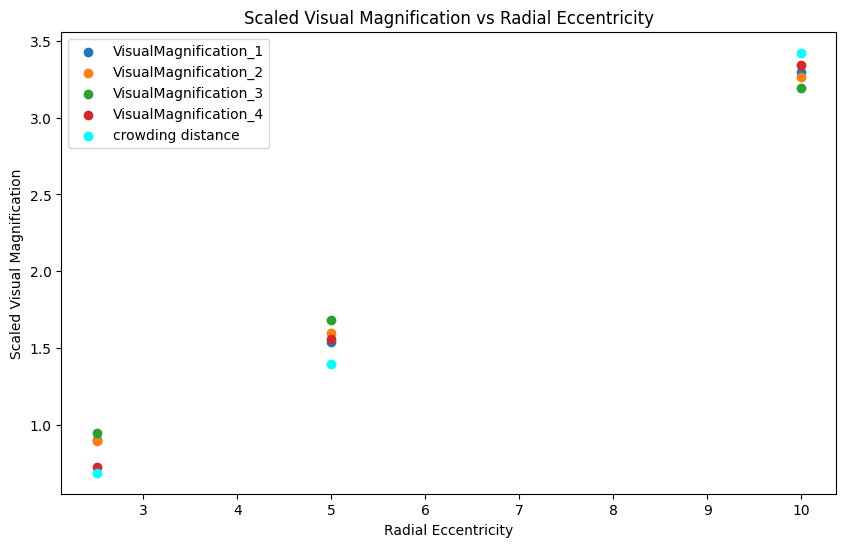

In [41]:
plt.figure(figsize=(10, 6))
for scale, col in zip([coef_y1,coef_y2,coef_y3,coef_y4],['VisualMagnification_1', 'VisualMagnification_2', 'VisualMagnification_3', 'VisualMagnification_4']):
    plt.scatter(grouped_df['RadialEccentricity'], scale * grouped_df[col], marker='o', linestyle='-', label=col)
plt.scatter(eccentricities, mean_values, color='cyan', label = 'crowding distance')
plt.xlabel('Radial Eccentricity')
plt.ylabel('Scaled Visual Magnification')
plt.title('Scaled Visual Magnification vs Radial Eccentricity')
plt.legend()
plt.show()